# geopandas testing with Occitania RPG data

Goal : 
- open RPG OCCITANIA
- select HERAULT croplands
- total of hectares by cereals
- % of cereals in croplands of Herault

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.validation import explain_validity
from datetime import datetime

# Occitania outline

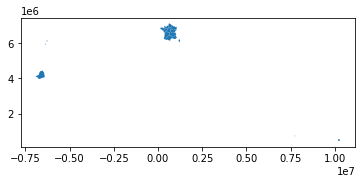

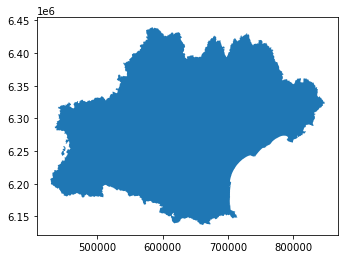

In [9]:
regions_outline = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/Region2020/Region2020.shp")
regions_outline.plot()
Occitania_outline = regions_outline.loc[regions_outline.loc[:,'LbRegion'] == 'Occitanie']
Occitania_outline.plot()
Occitania_outline = Occitania_outline.to_crs(4326)

# Occitania croplands

In [10]:
RPG_Occitanie_2020_parcelles = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/RPG_2-0_SHP_LAMB93_R76_2020/PARCELLES_GRAPHIQUES.shp")

In [11]:
RPG_Occitanie_2020_parcelles

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry
0,223624,0.06,J6P,11,None,None,"POLYGON ((635720.069 6221042.011, 635699.879 6..."
1,223625,4.66,LUZ,16,None,None,"POLYGON ((636420.326 6221085.963, 636431.438 6..."
2,223623,3.51,LUZ,16,None,None,"POLYGON ((635633.249 6220840.366, 635634.261 6..."
3,9444515,4.94,LUZ,16,None,None,"POLYGON ((636070.026 6220922.824, 636096.728 6..."
4,9444517,2.80,LUZ,16,None,None,"POLYGON ((636096.728 6220854.223, 636210.920 6..."
...,...,...,...,...,...,...,...
1602492,18755890,0.01,BFS,28,None,None,"POLYGON ((451736.442 6261867.424, 451736.429 6..."
1602493,9326014,1.34,PPH,18,None,None,"POLYGON ((780481.558 6287381.789, 780465.437 6..."
1602494,9326007,0.60,PPH,18,None,None,"POLYGON ((780550.784 6287072.242, 780551.257 6..."
1602495,9326017,1.47,PPH,18,None,None,"POLYGON ((784014.221 6295733.125, 784014.413 6..."


Attributes we will use : SURF_PARC and CODE_GROUP

### CRS harmonization

In [12]:
RPG_Occitanie_2020_parcelles.to_crs(4326, inplace=True)

### Occitania validity

In [13]:
RPG_Occitanie_2020_parcelles['geometry'].is_valid.value_counts()

True     1601249
False       1248
dtype: int64

Below, we can note that there are **1248 invalid geometries** in Occitania. 

In [14]:
RPG_Occitanie_2020_parcelles.loc[:,'validity'] = RPG_Occitanie_2020_parcelles.loc[:,'geometry'].is_valid

#select valid geometries in a new gdf called valid
valid = RPG_Occitanie_2020_parcelles.loc[RPG_Occitanie_2020_parcelles.loc[:,'validity'] == True]

#select invalid geometries in a new gdf called invalid
invalid = RPG_Occitanie_2020_parcelles.loc[RPG_Occitanie_2020_parcelles.loc[:,'validity'] == False]

#make invalid geometries valid with buffer function
corrected_df = invalid.copy()
corrected_geometry = invalid.buffer(0)
print(corrected_geometry)
corrected_df['geometry'] = corrected_geometry

#concatenate valid and corrected invalid geometry
Occitania = pd.concat([valid, corrected_df])
print('Is Occitania valid ?')
Occitania.loc[:,'geometry'].is_valid.value_counts()
Occitania.drop(['validity'],axis=1,inplace=True)

965        MULTIPOLYGON (((4.29089 44.30647, 4.29066 44.3...
2663       POLYGON ((1.03940 42.91056, 1.03932 42.90980, ...
2888       POLYGON ((1.88243 42.77790, 1.88269 42.77796, ...
3616       POLYGON ((1.64610 43.01966, 1.64630 43.02010, ...
4126       POLYGON ((1.88005 43.06000, 1.87999 43.06007, ...
                                 ...                        
1598220    POLYGON ((0.96194 44.14374, 0.96158 44.14407, ...
1599178    POLYGON ((0.79405 44.03154, 0.79425 44.03150, ...
1600026    MULTIPOLYGON (((1.07919 44.06471, 1.07925 44.0...
1600117    MULTIPOLYGON (((1.55131 44.09750, 1.55157 44.0...
1602447    POLYGON ((4.84088 43.99611, 4.84223 43.99322, ...
Length: 1248, dtype: geometry
Is Occitania valid ?


In [16]:
Occitania

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry
0,223624,0.06,J6P,11,None,None,"POLYGON ((2.21121 43.08578, 2.21096 43.08579, ..."
1,223625,4.66,LUZ,16,None,None,"POLYGON ((2.21980 43.08623, 2.21993 43.08612, ..."
2,223623,3.51,LUZ,16,None,None,"POLYGON ((2.21017 43.08395, 2.21018 43.08396, ..."
3,9444515,4.94,LUZ,16,None,None,"POLYGON ((2.21552 43.08474, 2.21585 43.08412, ..."
4,9444517,2.80,LUZ,16,None,None,"POLYGON ((2.21585 43.08412, 2.21726 43.08380, ..."
...,...,...,...,...,...,...,...
1598220,18585074,4.27,FLP,25,None,None,"POLYGON ((0.96194 44.14374, 0.96158 44.14407, ..."
1599178,18586033,0.36,BTA,28,None,None,"POLYGON ((0.79405 44.03154, 0.79425 44.03150, ..."
1600026,18586883,0.28,BTA,28,None,None,"MULTIPOLYGON (((1.07919 44.06471, 1.07925 44.0..."
1600117,18586974,0.15,BTA,28,None,None,"MULTIPOLYGON (((1.55131 44.09750, 1.55157 44.0..."


## RPG group class

In [15]:
group = pd.read_csv("/home/BTemple-Boyer-Dury/Documents/geopandas/France_group.csv", encoding= 'unicode_escape')
group.set_index('CODE_GROUPE_CULTURE', inplace = True)
d = group.to_dict('dict')
group_dict = d['LIBELLE_GROUPE_CULTURE']
group_dict

{1: 'Bl\x82 tendre',
 2: 'Ma\x8bs grain et ensilage',
 3: 'Orge',
 4: 'Autres c\x82r\x82ales',
 5: 'Colza',
 6: 'Tournesol',
 7: 'Autres ol\x82agineux',
 8: 'Prot\x82agineux',
 9: 'Plantes \x85 fibres',
 11: 'Gel (surfaces gel\x82es sans production)',
 14: 'Riz',
 15: 'L\x82gumineuses \x85 grains',
 16: 'Fourrage',
 17: 'Estives et landes',
 18: 'Prairies permanentes',
 19: 'Prairies temporaires',
 20: 'Vergers',
 21: 'Vignes',
 22: 'Fruits \x85 coque',
 23: 'Oliviers',
 24: 'Autres cultures industrielles',
 25: 'L\x82gumes ou fleurs',
 26: 'Canne \x85 sucre',
 28: 'Divers'}

When we take a look at the crop group reference table, we remark that we have not a class "cereals". Cereals can be seen as the set of CODE_GROUP 1 (= soft wheat), 2 (= grain maize and silage), 3 (= barley), and 4 (= other cereals).

# Herault outline

In [10]:
herault_outline = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/departement-34/admin-departement.shp")
herault_outline

,code_insee,nom,nuts3,wikipedia,geometry
0,34,Hérault,FR813,fr:Hérault (département),"MULTIPOLYGON (((3.50040 43.26318, 3.50064 43.2..."


note : herault_outline geometry is a **multipolygon** and not a polygon

In [11]:
print(RPG_Occitanie_2020_parcelles.crs)
print(herault_outline.crs)

epsg:4326
epsg:4326


### Plot Herault

Below, Herault's outline, an Occitania departement. 

<AxesSubplot:>

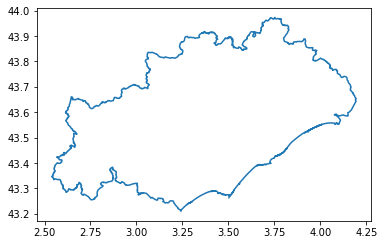

In [12]:
herault_outline.boundary.plot()

We've seen that Herault is a multipolygon, that contains 2 polygons. Let's explode it into 2 simple polygons, to view them one by one. 

<AxesSubplot:>

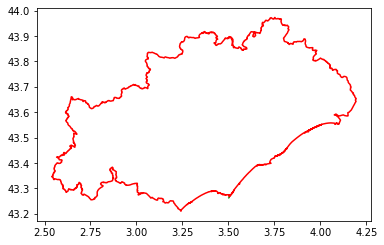

In [13]:
exploded = herault_outline.explode(index_parts=True)
exploded.boundary.plot(color=['green','red'])

In the plot above, we are not able to see the green area. I think because it is very little. </br> Below, we selected only the first polygon of Herault multipolygon (the little one) to plot it. 

,,code_insee,nom,nuts3,wikipedia,geometry
0,0,34,Hérault,FR813,fr:Hérault (département),"POLYGON ((3.50040 43.26318, 3.50064 43.26330, ..."


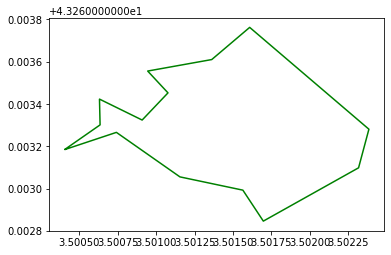

In [14]:
exploded.iloc[[0]].boundary.plot(color = 'green')
herault_polygon_0 = exploded.iloc[[0]]
herault_polygon_0

Below, we selected only the second polygon of Herault multipolygon (the big one) to plot it. 

,,code_insee,nom,nuts3,wikipedia,geometry
0,1,34,Hérault,FR813,fr:Hérault (département),"POLYGON ((2.78706 43.27449, 2.78707 43.27416, ..."


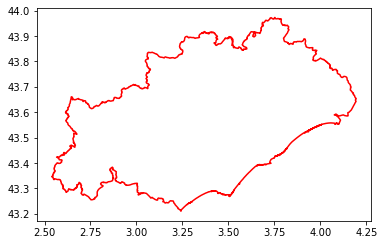

In [15]:
exploded.iloc[[1]].boundary.plot(color='red')
herault_polygon_1 = exploded.iloc[[1]]
herault_polygon_1

### Herault validity 

Is herault_polygon_0 valid ?

In [16]:
herault_polygon_0.is_valid

0  0    True
dtype: bool

Is herault_polygon_1 valid ?

In [17]:
herault_polygon_1.is_valid

0  1    True
dtype: bool

# Herault croplands

### First method : intersection

In [18]:
#start_int = datetime.now()
#Herault_crops = Occitania['geometry'].intersection(herault_polygon_1['geometry'].iloc[0])
#end_int = datetime.now()
#Herault_crops
#duration_int = end_int - start_int
#print('Intersection method takes : ')
#duration_int

### Second method : sjoin with Rtree

In [19]:
start_join = datetime.now()
Herault_crops = gpd.sjoin(Occitania, herault_polygon_1, predicate='intersects', )
end_join = datetime.now()
Herault_crops
duration_join = end_join - start_join
print('Sjoin method takes : ')
print(duration_join)

Sjoin method takes : 
0:02:32.704163


In [20]:
#start_plot = datetime.now()
#f, ax = plt.subplots()
#Occitania.plot(ax=ax, color = 'blue')
#Herault_crops.plot(ax=ax, color = 'green')
#plt.show()
#end_plot = datetime.now()
#duation_plot = end_plot - start_plot 
#print('The plotting step with matplotlib takes : ')
#print(duration_plot)

**The plotting step above have made the computer crashed several times** --> Let's try to decrease the data size we are working with. </br>
1) retrieve all the columns not related with RPG dataframe in the dataframe result of jointure. </br>
2) instead of plotting all croplands from Occitania and Herault, let's only plot Herault croplands. The first goal was to select croplands from Herault among Occitania. To visualize it, let's use the Occitania outline and the jointure result that contains croplands from Herault. 

In [21]:
print(list(Herault_crops.columns))

['ID_PARCEL', 'SURF_PARC', 'CODE_CULTU', 'CODE_GROUP', 'CULTURE_D1', 'CULTURE_D2', 'geometry', 'index_right0', 'index_right1', 'code_insee', 'nom', 'nuts3', 'wikipedia']


In [22]:
l = list(herault_polygon_1.columns)
l2 = filter(lambda col:col != 'geometry',l)
col_Herault_outline = list(l2)
col_created_by_joins = ['index_right0', 'index_right1']
l4 = col_Herault_outline + col_created_by_joins
l4

['code_insee', 'nom', 'nuts3', 'wikipedia', 'index_right0', 'index_right1']

In [23]:
Herault_crops.drop(l4, axis=1,inplace= True)
Herault_crops
#Herault_crops.plot()

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry
185,16531000,0.70,PPH,18,None,None,"POLYGON ((4.03950 43.79252, 4.03919 43.79259, ..."
186,16531001,0.65,PTR,19,None,None,"POLYGON ((4.03795 43.79396, 4.03768 43.79284, ..."
187,16531002,0.94,PPH,18,None,None,"POLYGON ((4.03531 43.79481, 4.03587 43.79472, ..."
188,16531003,0.44,PTR,19,None,None,"POLYGON ((4.03697 43.79531, 4.03738 43.79537, ..."
194,16532363,1.36,SAI,16,None,None,"POLYGON ((4.04950 43.79081, 4.04944 43.79078, ..."
...,...,...,...,...,...,...,...
960712,17282263,0.85,VRC,21,None,None,"POLYGON ((3.13289 43.36300, 3.13328 43.36354, ..."
961208,17282760,0.02,BOR,28,None,None,"POLYGON ((3.38029 43.44118, 3.38010 43.44103, ..."
961617,17283169,0.81,VRC,21,None,None,"POLYGON ((3.35455 43.46402, 3.35456 43.46403, ..."
963743,17285295,1.55,RVI,21,None,None,"POLYGON ((3.49714 43.68853, 3.49697 43.68823, ..."


<AxesSubplot:>

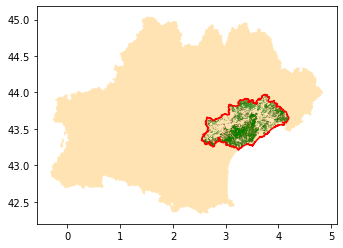

In [24]:
ax = Occitania_outline.plot(color = 'orange', alpha=0.3)
#ax.set_ylim((6.10*10**6, 6.45*10**6))
herault_polygon_1.boundary.plot(ax=ax, color='red')
Herault_crops.plot(ax=ax, color='green')

## croplands percentages in Herault ?

In [25]:
Herault_crops = Herault_crops[['CODE_CULTU','CODE_GROUP','SURF_PARC','geometry']]
Herault_crops

,CODE_CULTU,CODE_GROUP,SURF_PARC,geometry
185,PPH,18,0.70,"POLYGON ((4.03950 43.79252, 4.03919 43.79259, ..."
186,PTR,19,0.65,"POLYGON ((4.03795 43.79396, 4.03768 43.79284, ..."
187,PPH,18,0.94,"POLYGON ((4.03531 43.79481, 4.03587 43.79472, ..."
188,PTR,19,0.44,"POLYGON ((4.03697 43.79531, 4.03738 43.79537, ..."
194,SAI,16,1.36,"POLYGON ((4.04950 43.79081, 4.04944 43.79078, ..."
...,...,...,...,...
960712,VRC,21,0.85,"POLYGON ((3.13289 43.36300, 3.13328 43.36354, ..."
961208,BOR,28,0.02,"POLYGON ((3.38029 43.44118, 3.38010 43.44103, ..."
961617,VRC,21,0.81,"POLYGON ((3.35455 43.46402, 3.35456 43.46403, ..."
963743,RVI,21,1.55,"POLYGON ((3.49714 43.68853, 3.49697 43.68823, ..."


In [26]:
surf_tot_Herault = Herault_crops["SURF_PARC"].sum()
percentages = {}
for k,v in group_dict.items(): 
    a = Herault_crops[Herault_crops['CODE_GROUP']==str(k)]
    s = a["SURF_PARC"].sum()
    p = (s*100) / surf_tot_Herault
    percentages[v] = p
percentages
per_Herault_2020_croplands = pd.DataFrame.from_dict(percentages,orient='index')
per_Herault_2020_croplands

,0
Bl tendre,2.035268
Mas grain et ensilage,0.312203
Orge,0.978420
Autres crales,3.652683
Colza,0.098560
Tournesol,0.260583
Autres olagineux,0.006739
Protagineux,0.115189
Plantes fibres,0.000000
Gel (surfaces geles sans production),2.434821


# Next goal : do the same but with ICC classification

In [22]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 5 else ''

<AxesSubplot:ylabel='0'>

/home/BTemple-Boyer-Dury/miniconda3/envs/classificrops_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/BTemple-Boyer-Dury/miniconda3/envs/classificrops_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/BTemple-Boyer-Dury/miniconda3/envs/classificrops_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


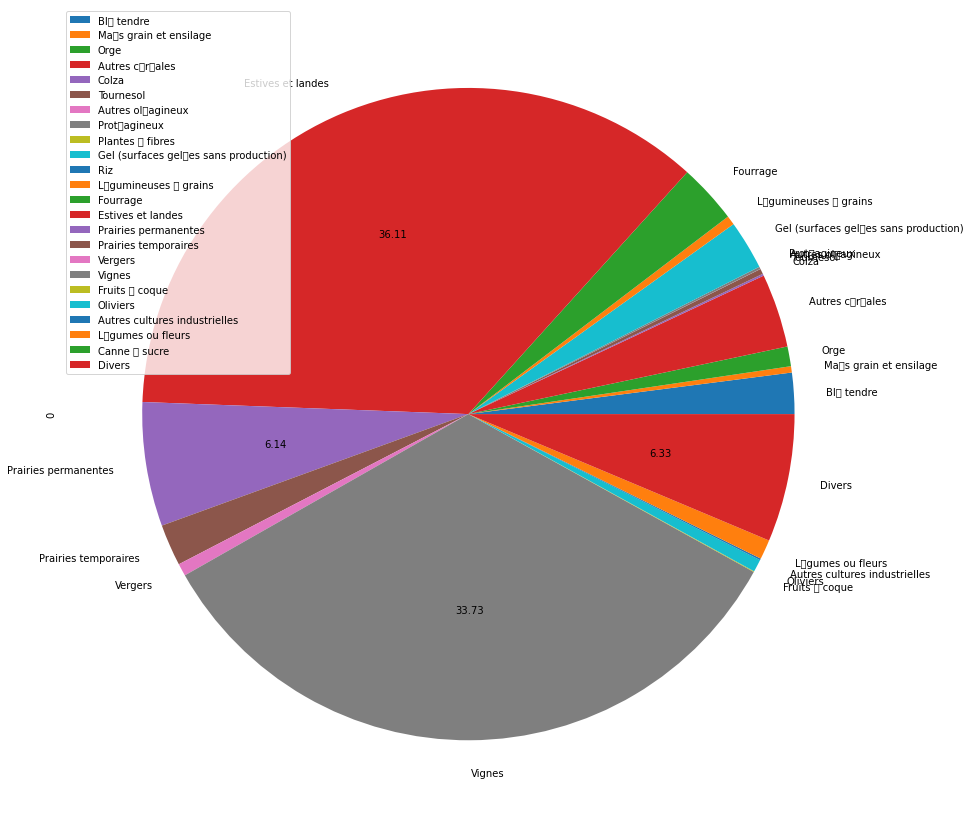

In [28]:
per_Herault_2020_croplands.plot.pie(y=0, figsize=(15, 15), autopct=autopct)

## ICC classification

In [30]:
group_icc = pd.read_csv("/home/BTemple-Boyer-Dury/Documents/Classificrops/data/ICC/ICC_group.csv", encoding= 'unicode_escape')
group_icc

,ID,label_en
0,1,Cereals
1,2,Vegetables and melons
2,3,Fruit and nuts
3,4,Oilseed crops and oleaginous fruits
4,5,Root/tuber crops with high starch or inulin co...
5,6,"Stimulant, spice and aromatic crops"
6,7,Leguminous crops
7,8,Sugar crops
8,9,Other crops


In [31]:
group_icc.set_index('ID', inplace = True)
d_icc = group_icc.to_dict('dict')
group_dict_icc = d_icc['label_en']
group_dict_icc

{1: 'Cereals',
 2: 'Vegetables and melons',
 3: 'Fruit and nuts',
 4: 'Oilseed crops and oleaginous fruits',
 5: 'Root/tuber crops with high starch or inulin content',
 6: 'Stimulant, spice and aromatic crops',
 7: 'Leguminous crops',
 8: 'Sugar crops',
 9: 'Other crops'}

we are interested by CODE_CULTU and SURF_PARC

### conversion FR ICC

In [27]:
conversion_fr_icc = pd.read_csv("/home/BTemple-Boyer-Dury/Documents/Classificrops/data/FR/conversion_table_FR_handmade.csv", encoding= 'unicode_escape')
conversion_fr_icc.rename(columns = {'ID_CROPS_FR':'CODE_CULTU'}, inplace=True)
conversion_fr_icc

,CODE_CULTU,ID_GROUP_ICC
0,BTH,1
1,BTP,1
2,MID,1
3,MIE,1
4,MIS,1
...,...,...
346,TCR,9
347,TRU,2
348,VET,9
349,ZZZ,9


In [32]:
Herault_icc_merged = Herault_crops.merge(conversion_fr_icc, how='left', on='CODE_CULTU')
Herault_icc_merged

,CODE_CULTU,CODE_GROUP,SURF_PARC,geometry,ID_GROUP_ICC
0,PPH,18,0.70,"POLYGON ((4.03950 43.79252, 4.03919 43.79259, ...",9
1,PTR,19,0.65,"POLYGON ((4.03795 43.79396, 4.03768 43.79284, ...",9
2,PPH,18,0.94,"POLYGON ((4.03531 43.79481, 4.03587 43.79472, ...",9
3,PTR,19,0.44,"POLYGON ((4.03697 43.79531, 4.03738 43.79537, ...",9
4,SAI,16,1.36,"POLYGON ((4.04950 43.79081, 4.04944 43.79078, ...",9
...,...,...,...,...,...
137250,VRC,21,0.85,"POLYGON ((3.13289 43.36300, 3.13328 43.36354, ...",3
137251,BOR,28,0.02,"POLYGON ((3.38029 43.44118, 3.38010 43.44103, ...",9
137252,VRC,21,0.81,"POLYGON ((3.35455 43.46402, 3.35456 43.46403, ...",3
137253,RVI,21,1.55,"POLYGON ((3.49714 43.68853, 3.49697 43.68823, ...",3


In [33]:
surf_tot_Herault = Herault_crops["SURF_PARC"].sum()
percentages_icc = {}
for k,v in group_dict_icc.items(): 
    a = Herault_icc_merged[Herault_icc_merged['ID_GROUP_ICC']==k]
    s = a["SURF_PARC"].sum()
    p = (s*100) / surf_tot_Herault
    percentages_icc[v] = p
percentages_icc

{'Cereals': 6.978572861772212,
 'Vegetables and melons': 1.0012982993033595,
 'Fruit and nuts': 34.38329151804977,
 'Oilseed crops and oleaginous fruits': 0.9837721763060683,
 'Root/tuber crops with high starch or inulin content': 0.017979824261619044,
 'Stimulant, spice and aromatic crops': 6.627097119394597e-05,
 'Leguminous crops': 0.5715106600425601,
 'Sugar crops': 0.0,
 'Other crops': 56.06350838929321}

<AxesSubplot:ylabel='0'>

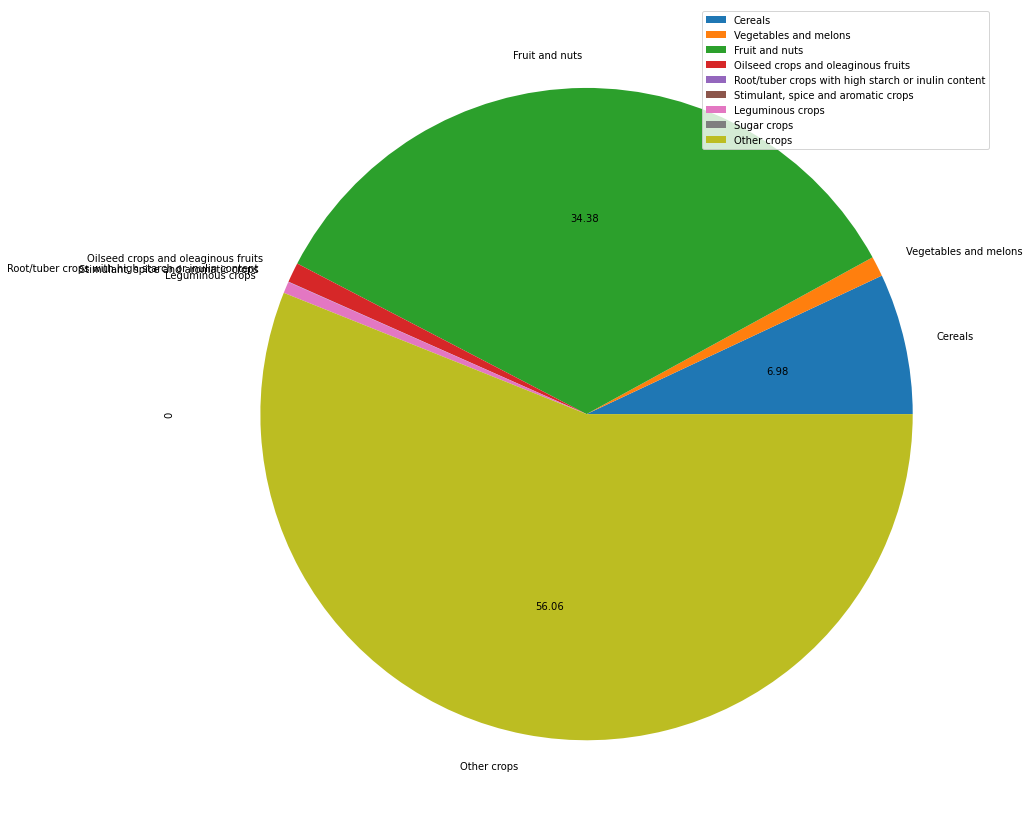

In [34]:
df_icc_2 = pd.DataFrame.from_dict(percentages_icc,orient='index')
df_icc_2
df_icc_2.plot.pie(y=0, figsize=(15, 15), autopct=autopct)

pseudo code : If "other crops" represents more than 10%, its composition should be detailed. Issue : classificrops is not (yet)designed for a level superior to level = 0 (GROUP).  

# Pyrenees-Orientales

<AxesSubplot:>

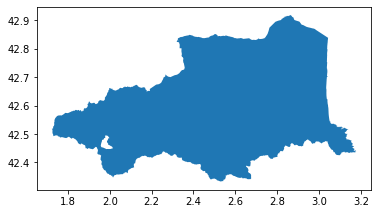

In [17]:
departments_outline = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/departements-20220101-shp")
PO_outline = departments_outline.loc[departments_outline.loc[:,'nom']=='Pyrénées-Orientales']
PO_outline.plot()

In [18]:
start_join = datetime.now()
PO_crops = gpd.sjoin(Occitania, PO_outline, predicate='intersects')
end_join = datetime.now()
PO_crops
duration_join = end_join - start_join
print('Sjoin method takes : ')
print(duration_join)

Sjoin method takes : 
0:02:19.413115


KeyboardInterrupt: 

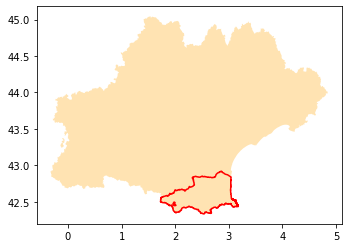

In [19]:
ax = Occitania_outline.plot(color = 'orange', alpha=0.3)
#ax.set_ylim((6.10*10**6, 6.45*10**6))
PO_outline.boundary.plot(ax=ax, color='red')
PO_crops.plot(ax=ax, color='green')

<AxesSubplot:>

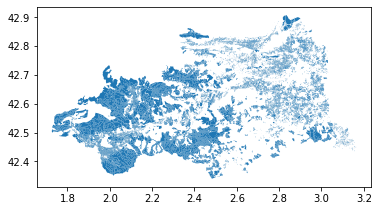

In [51]:
PO_crops = PO_crops[['CODE_CULTU','CODE_GROUP','SURF_PARC','geometry']]
PO_crops.plot()

<AxesSubplot:ylabel='0'>

/home/BTemple-Boyer-Dury/miniconda3/envs/classificrops_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/BTemple-Boyer-Dury/miniconda3/envs/classificrops_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/BTemple-Boyer-Dury/miniconda3/envs/classificrops_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


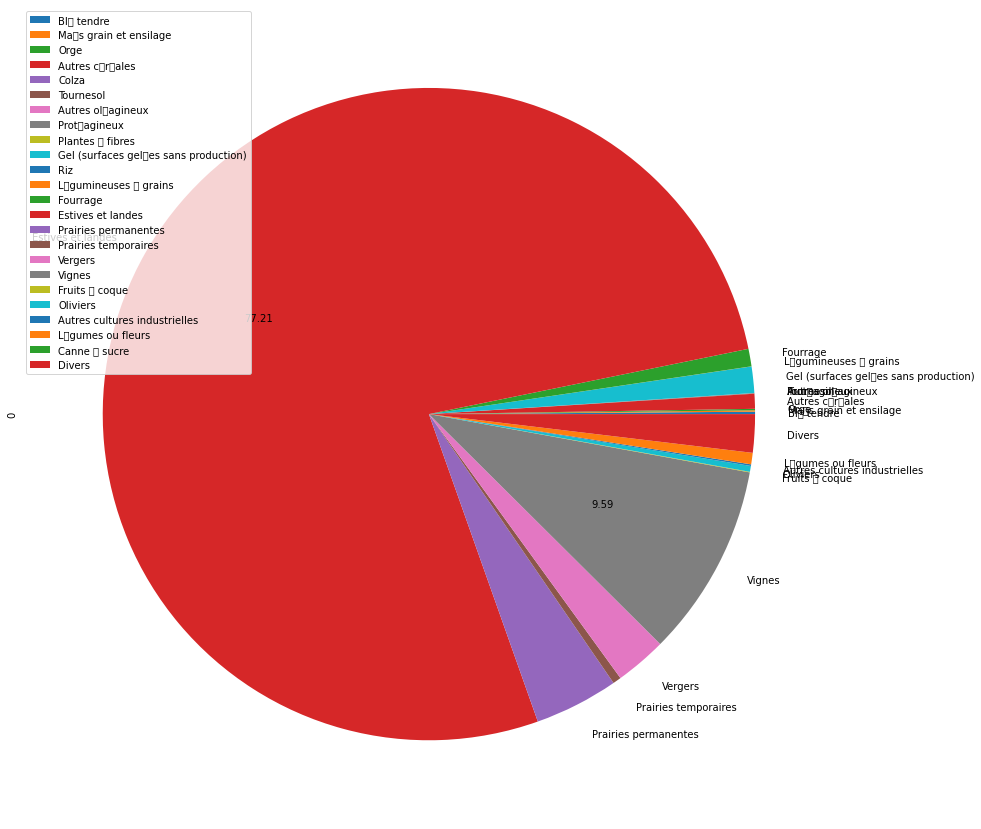

In [32]:
surf_tot_PO = PO_crops["SURF_PARC"].sum()
percentages_PO = {}
for k,v in group_dict.items(): 
    a = PO_crops[PO_crops['CODE_GROUP']==str(k)]
    s = a["SURF_PARC"].sum()
    p = (s*100) / surf_tot_PO
    percentages_PO[v] = p
percentages_PO
per_PO_2020_croplands = pd.DataFrame.from_dict(percentages_PO,orient='index')
per_PO_2020_croplands.plot.pie(y=0, figsize=(15, 15), autopct=autopct)

## PO ICC

<AxesSubplot:ylabel='0'>

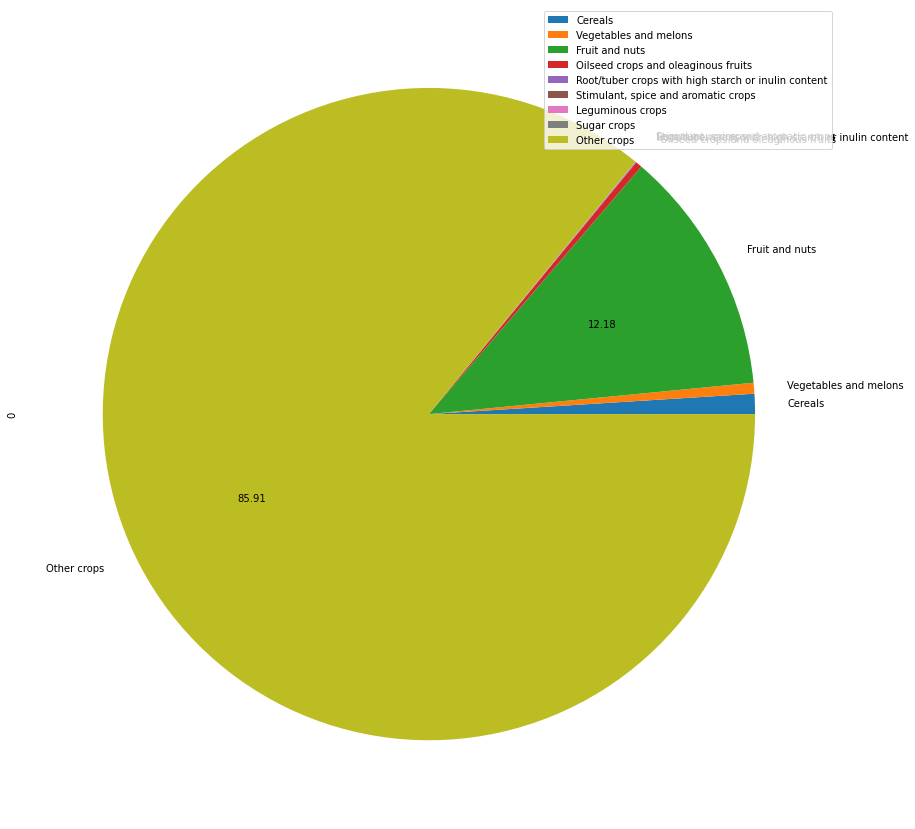

In [33]:
PO_icc_merged = PO_crops.merge(conversion_fr_icc, how='left', on='CODE_CULTU')

surf_tot_PO = PO_crops["SURF_PARC"].sum()
percentages_icc = {}
for k,v in group_dict_icc.items(): 
    a = PO_icc_merged[PO_icc_merged['ID_GROUP_ICC']==k]
    s = a["SURF_PARC"].sum()
    p = (s*100) / surf_tot_PO
    percentages_icc[v] = p

df_icc_2 = pd.DataFrame.from_dict(percentages_icc,orient='index')
df_icc_2
df_icc_2.plot.pie(y=0, figsize=(15, 15), autopct=autopct)

# Catalunya

In [34]:
croplands_Catalunya_2020 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/Cultius_DUN2020_SHP")


In [42]:
croplands_Catalunya_2020.to_crs(4326, inplace=True)
print(croplands_Catalunya_2020.crs)

epsg:4326


In [35]:
group_cat = pd.read_csv("/home/BTemple-Boyer-Dury/Documents/Classificrops/data/CAT/CAT_2020.csv")
group_cat.drop(['Cultiu'], axis=1, inplace = True)
group_cat_array = group_cat['Grup'].unique()
group_cat_array
group_cat_dict = dict()
for index,value in enumerate(group_cat_array):
  group_cat_dict[index] = value
group_cat_dict

{0: 'FRUITA DOLCA',
 1: 'CEREALS',
 2: "CEREALS D'ESTIU",
 3: 'HORTICOLES',
 4: 'OLIVERAR',
 5: 'GUARET',
 6: 'PROTEAGINOSES',
 7: 'LLEGUMINOSES',
 8: 'VINYA',
 9: 'FRUITS DE CLOSCA',
 10: 'OLEAGINOSES',
 11: 'FARRATGERES',
 12: 'ALTRES PRODUCTES',
 13: 'CITRICS',
 14: 'ARROS'}

In [44]:
Tarragona_crops = croplands_Catalunya_2020.loc[croplands_Catalunya_2020.loc[:,'Municipi']=='TARRAGONA']
Tarragona_crops

,OBJECTID,Campanya,Provincia,Comarca,Municipi,ID_MUN,Grup,Cultiu,Seca_Regad,HA,Shape_Leng,Shape_Area,geometry
639113,639517,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,CEREALS,ORDI,R,1.2659,746.398817,12658.552025,"POLYGON ((1.23910 41.14361, 1.23905 41.14329, ..."
639114,639518,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,CEREALS,ORDI,R,0.5137,431.919319,5136.883951,"POLYGON ((1.23819 41.14821, 1.23827 41.14803, ..."
639115,639519,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,CEREALS,ORDI,R,0.4199,388.452482,4199.084840,"POLYGON ((1.23858 41.14882, 1.23859 41.14878, ..."
639116,639520,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,CEREALS,CIVADA,R,0.7632,380.979206,7631.627913,"POLYGON ((1.36833 41.13202, 1.36819 41.13200, ..."
639117,639521,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,CEREALS,CIVADA,R,0.3980,269.485332,3979.720421,"POLYGON ((1.36989 41.13493, 1.37008 41.13493, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639439,639843,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,FRUITS DE CLOSCA,AVELLANER,S,0.6637,358.872798,6637.060217,"POLYGON ((1.35800 41.14146, 1.35798 41.14146, ..."
639440,639844,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,FRUITS DE CLOSCA,AVELLANER,S,0.7197,352.437932,7196.506975,"POLYGON ((1.36019 41.14355, 1.36081 41.14348, ..."
639441,639845,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,FRUITS DE CLOSCA,AVELLANER,S,0.9453,458.761842,9452.551202,"POLYGON ((1.36010 41.14335, 1.36003 41.14309, ..."
639442,639846,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,FRUITS DE CLOSCA,AVELLANER,S,0.5812,305.004742,5812.015339,"POLYGON ((1.36022 41.14374, 1.36021 41.14371, ..."


In [45]:
croplands_Catalunya_2020

,OBJECTID,Campanya,Provincia,Comarca,Municipi,ID_MUN,Grup,Cultiu,Seca_Regad,HA,Shape_Leng,Shape_Area,geometry
0,1,2020,Barcelona,Baix Llobregat,ABRERA,08001,FRUITA DOLCA,PERERES/POMERES,R,2.1929,919.616029,21915.425570,"POLYGON ((1.91919 41.50067, 1.91934 41.49996, ..."
1,2,2020,Barcelona,Baix Llobregat,ABRERA,08001,CEREALS,ORDI,R,0.4991,299.814725,4987.855571,"POLYGON ((1.91088 41.50416, 1.91085 41.50406, ..."
2,3,2020,Barcelona,Baix Llobregat,ABRERA,08001,CEREALS D'ESTIU,SORGO,R,13.9373,1661.211444,139289.589911,"POLYGON ((1.91318 41.50698, 1.91370 41.50684, ..."
3,4,2020,Barcelona,Baix Llobregat,ABRERA,08001,CEREALS,CIVADA,R,0.7908,490.199650,7903.753107,"POLYGON ((1.91092 41.50429, 1.91088 41.50416, ..."
4,5,2020,Barcelona,Baix Llobregat,ABRERA,08001,CEREALS,CIVADA,R,1.8331,597.707743,18320.317206,"POLYGON ((1.91499 41.50734, 1.91490 41.50719, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639439,639843,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,FRUITS DE CLOSCA,AVELLANER,S,0.6637,358.872798,6637.060217,"POLYGON ((1.35800 41.14146, 1.35798 41.14146, ..."
639440,639844,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,FRUITS DE CLOSCA,AVELLANER,S,0.7197,352.437932,7196.506975,"POLYGON ((1.36019 41.14355, 1.36081 41.14348, ..."
639441,639845,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,FRUITS DE CLOSCA,AVELLANER,S,0.9453,458.761842,9452.551202,"POLYGON ((1.36010 41.14335, 1.36003 41.14309, ..."
639442,639846,2020,Tarragona,TarragonÃ¨s,TARRAGONA,43900,FRUITS DE CLOSCA,AVELLANER,S,0.5812,305.004742,5812.015339,"POLYGON ((1.36022 41.14374, 1.36021 41.14371, ..."


#### + step to plot Tarragona among Catalunya, need Catalunya outline

In [46]:
Tarragona_crops = Tarragona_crops[['Grup','Cultiu','HA','geometry']]

<AxesSubplot:ylabel='0'>

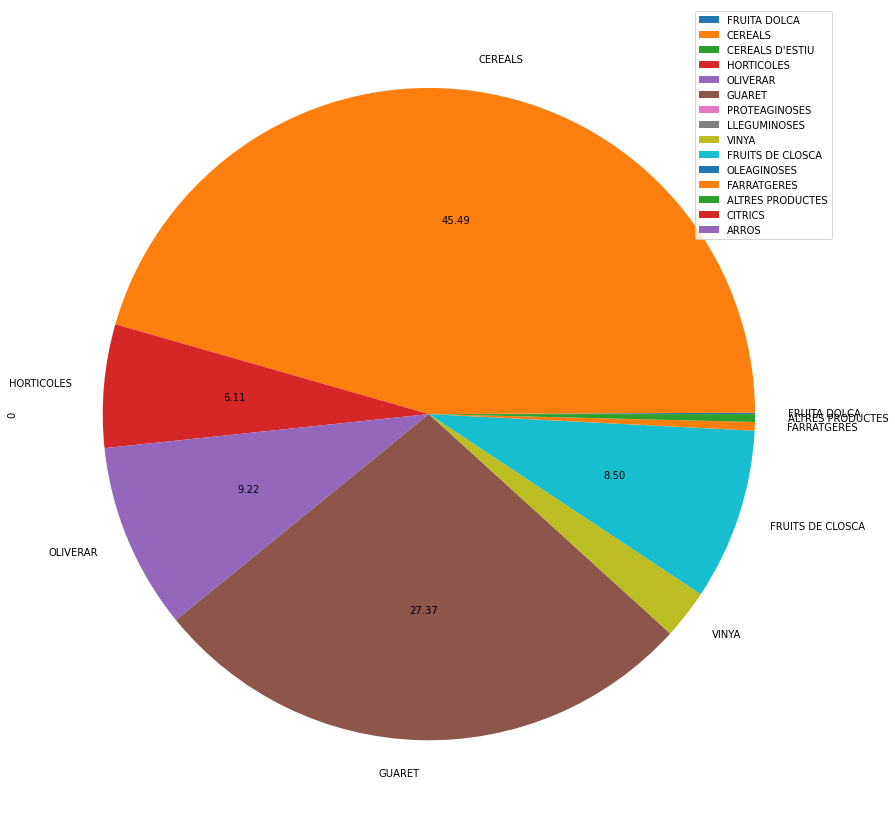

In [47]:
surf_tot_TAR = Tarragona_crops["HA"].sum()
percentages_TAR = {}
for k,v in group_cat_dict.items(): 
    a = Tarragona_crops[Tarragona_crops['Grup']==str(v)]
    s = a["HA"].sum()
    p = (s*100) / surf_tot_TAR
    percentages_TAR[v] = p
percentages_TAR
per_TAR_2020_croplands = pd.DataFrame.from_dict(percentages_TAR,orient='index')
per_TAR_2020_croplands.plot.pie(y=0, figsize=(15, 15), autopct=autopct)

In [48]:
per_TAR_2020_croplands

,0
FRUITA DOLCA,0.069003
CEREALS,45.489831
CEREALS D'ESTIU,0.000000
HORTICOLES,6.105647
OLIVERAR,9.218424
GUARET,27.372249
PROTEAGINOSES,0.000000
LLEGUMINOSES,0.000000
VINYA,2.431033
FRUITS DE CLOSCA,8.502689


## conversion CAT ICC

In [36]:
conversion_cat_icc = pd.read_csv("/home/BTemple-Boyer-Dury/Documents/Classificrops/data/CAT/handmade_Nicolas.csv", encoding= 'unicode_escape')
#conversion_fr_icc.rename(columns = {'ID_CROPS_FR':'CODE_CULTU'}, inplace=True)
conversion_cat_icc['ID_GROUP_ICC'] = conversion_cat_icc['ICC1.1'].str[:1]
conversion_cat_icc.drop(['ICC1.1'],axis=1, inplace=True)
conversion_cat_icc.rename(columns = {'Catala':'Cultiu'}, inplace=True)
conversion_cat_icc

,Cultiu,ID_GROUP_ICC
0,AGROSTIS,9
1,ALBERCOQUERS,3
2,ALBERGÃNIA,2
3,ALFÃBREGA,9
4,ALFALS NO SIE,9
...,...,...
172,VEÃA I TRITICALE SIE,7
173,VECES NO SIE,7
174,VECES SIE,7
175,VINYES,3


In [50]:
Tarragona_icc_merged = Tarragona_crops.merge(conversion_cat_icc, how='left', on='Cultiu')
Tarragona_icc_merged

,Grup,Cultiu,HA,geometry,ID_GROUP_ICC
0,CEREALS,ORDI,1.2659,"POLYGON ((1.23910 41.14361, 1.23905 41.14329, ...",1
1,CEREALS,ORDI,0.5137,"POLYGON ((1.23819 41.14821, 1.23827 41.14803, ...",1
2,CEREALS,ORDI,0.4199,"POLYGON ((1.23858 41.14882, 1.23859 41.14878, ...",1
3,CEREALS,CIVADA,0.7632,"POLYGON ((1.36833 41.13202, 1.36819 41.13200, ...",1
4,CEREALS,CIVADA,0.3980,"POLYGON ((1.36989 41.13493, 1.37008 41.13493, ...",1
...,...,...,...,...,...
326,FRUITS DE CLOSCA,AVELLANER,0.6637,"POLYGON ((1.35800 41.14146, 1.35798 41.14146, ...",3
327,FRUITS DE CLOSCA,AVELLANER,0.7197,"POLYGON ((1.36019 41.14355, 1.36081 41.14348, ...",3
328,FRUITS DE CLOSCA,AVELLANER,0.9453,"POLYGON ((1.36010 41.14335, 1.36003 41.14309, ...",3
329,FRUITS DE CLOSCA,AVELLANER,0.5812,"POLYGON ((1.36022 41.14374, 1.36021 41.14371, ...",3


<AxesSubplot:ylabel='0'>

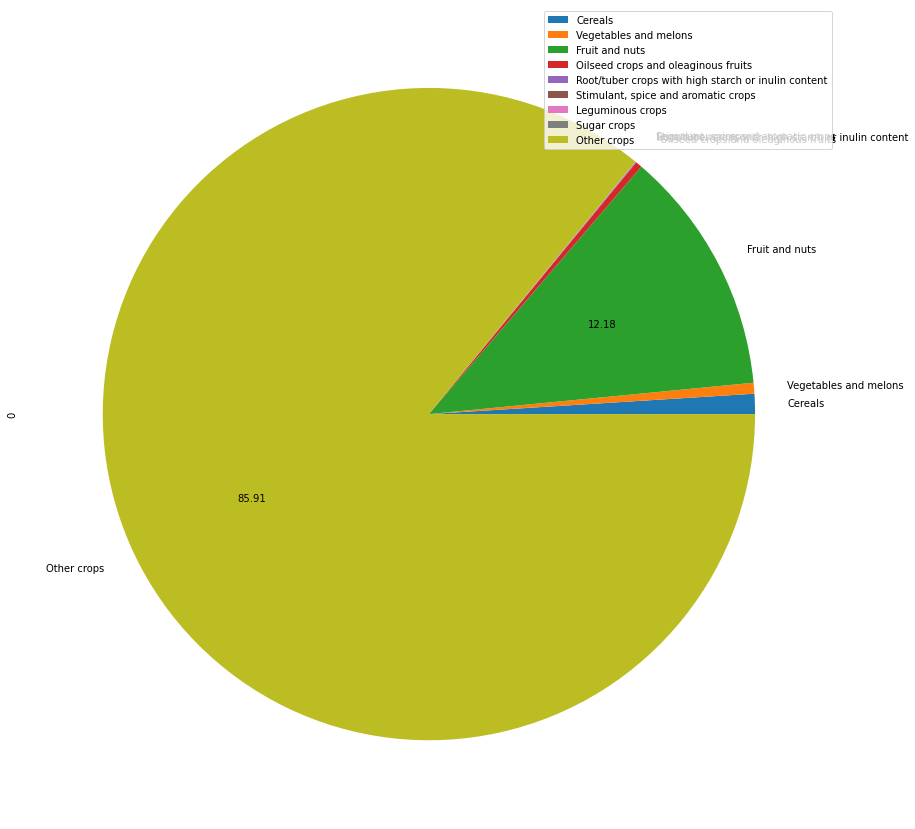

In [51]:
df_icc_2 = pd.DataFrame.from_dict(percentages_icc,orient='index')
df_icc_2
df_icc_2.plot.pie(y=0, figsize=(15, 15), autopct=autopct)

In [52]:
Herault_icc_merged

,CODE_CULTU,CODE_GROUP,SURF_PARC,geometry,ID_GROUP_ICC
0,PPH,18,0.70,"POLYGON ((4.03950 43.79252, 4.03919 43.79259, ...",9
1,PTR,19,0.65,"POLYGON ((4.03795 43.79396, 4.03768 43.79284, ...",9
2,PPH,18,0.94,"POLYGON ((4.03531 43.79481, 4.03587 43.79472, ...",9
3,PTR,19,0.44,"POLYGON ((4.03697 43.79531, 4.03738 43.79537, ...",9
4,SAI,16,1.36,"POLYGON ((4.04950 43.79081, 4.04944 43.79078, ...",9
...,...,...,...,...,...
137250,VRC,21,0.85,"POLYGON ((3.13289 43.36300, 3.13328 43.36354, ...",3
137251,BOR,28,0.02,"POLYGON ((3.38029 43.44118, 3.38010 43.44103, ...",9
137252,VRC,21,0.81,"POLYGON ((3.35455 43.46402, 3.35456 43.46403, ...",3
137253,RVI,21,1.55,"POLYGON ((3.49714 43.68853, 3.49697 43.68823, ...",3


In [53]:
Tarragona_icc_merged

,Grup,Cultiu,HA,geometry,ID_GROUP_ICC
0,CEREALS,ORDI,1.2659,"POLYGON ((1.23910 41.14361, 1.23905 41.14329, ...",1
1,CEREALS,ORDI,0.5137,"POLYGON ((1.23819 41.14821, 1.23827 41.14803, ...",1
2,CEREALS,ORDI,0.4199,"POLYGON ((1.23858 41.14882, 1.23859 41.14878, ...",1
3,CEREALS,CIVADA,0.7632,"POLYGON ((1.36833 41.13202, 1.36819 41.13200, ...",1
4,CEREALS,CIVADA,0.3980,"POLYGON ((1.36989 41.13493, 1.37008 41.13493, ...",1
...,...,...,...,...,...
326,FRUITS DE CLOSCA,AVELLANER,0.6637,"POLYGON ((1.35800 41.14146, 1.35798 41.14146, ...",3
327,FRUITS DE CLOSCA,AVELLANER,0.7197,"POLYGON ((1.36019 41.14355, 1.36081 41.14348, ...",3
328,FRUITS DE CLOSCA,AVELLANER,0.9453,"POLYGON ((1.36010 41.14335, 1.36003 41.14309, ...",3
329,FRUITS DE CLOSCA,AVELLANER,0.5812,"POLYGON ((1.36022 41.14374, 1.36021 41.14371, ...",3


In [38]:
from collections import defaultdict
def create_keys(my_array):
    my_keys = defaultdict(list)
    for i in my_array: 
        my_keys[i[0:3]].append(i)
    my_keys

    my_dict={}
    for k,l in my_keys.items():
        if len(l) > 1:
            for i in l:
                my_dict[i]=i

    for k,v in my_dict.items():
        if k[0:3] in my_keys.keys():
            del my_keys[k[0:3]]
    for k,l in my_keys.items():
        my_keys[k] = l[0]
    my_keys.update(my_dict)
    return my_keys

In [39]:
from collections import defaultdict
def create_keys(my_array):
    my_keys = defaultdict(list)
    for i in my_array: 
        my_keys[i[0:3]].append(i)
    doublons=[]
    for k,l in my_keys.items():
        if len(l) > 1:
            doublons.append(k)
        my_keys[k] = l[0]
    for k in doublons:
        del my_keys[k]
    return my_keys

In [59]:
Grups = Tarragona_icc_merged['Grup'].unique()
Grups
Cultius = Tarragona_icc_merged['Cultiu'].unique()
Cultius

array(['ORDI', 'CIVADA', 'TRITICALE', 'GUARET NO SIE/ SUP. LLIURE SE*',
       'FESTUCA', 'PATATA', 'OLIVERES', 'AMETLLERS', 'ALTRES FRUITERS',
       'AVELLANER', 'MELÃ\x93', 'ENCIAM',
       'CEBES, CALÃ\x87OTS, PORROS I ALLS', 'COL I COLIFLOR',
       'CARBASSÃ\x93', 'HORTA', 'TOMÃ\x80QUET', 'JULIVERT',
       'GUARET SIE/ SUP. LLIURE SEMBRA', 'VINYES', 'GARROFER'],
      dtype=object)

In [60]:
Grups_keys = create_keys(Grups)
Grups_keys

defaultdict(list,
            {'CER': 'CEREALS',
             'GUA': 'GUARET',
             'FAR': 'FARRATGERES',
             'HOR': 'HORTICOLES',
             'OLI': 'OLIVERAR',
             'ALT': 'ALTRES PRODUCTES',
             'VIN': 'VINYA'})

In [61]:
Cultius_keys = create_keys(Cultius)
Cultius_keys

defaultdict(list,
            {'ORD': 'ORDI',
             'CIV': 'CIVADA',
             'TRI': 'TRITICALE',
             'FES': 'FESTUCA',
             'PAT': 'PATATA',
             'OLI': 'OLIVERES',
             'AME': 'AMETLLERS',
             'ALT': 'ALTRES FRUITERS',
             'AVE': 'AVELLANER',
             'MEL': 'MELÃ\x93',
             'ENC': 'ENCIAM',
             'CEB': 'CEBES, CALÃ\x87OTS, PORROS I ALLS',
             'COL': 'COL I COLIFLOR',
             'CAR': 'CARBASSÃ\x93',
             'HOR': 'HORTA',
             'TOM': 'TOMÃ\x80QUET',
             'JUL': 'JULIVERT',
             'VIN': 'VINYES',
             'GAR': 'GARROFER'})

In [52]:
Tarragona_icc_merged['CODE_GROUP'] = Tarragona_icc_merged['Grup'].apply(lambda x : k if (x == v for k,v in Grups_keys) else x)
Tarragona_icc_merged['CODE_CULTU'] = Tarragona_icc_merged['Cultiu'].apply(lambda x : k if (x == v for k,v in Cultius_keys) else x)
Tarragona_icc_merged
#Tarragona_icc_merged['CODE_CULTU']=

NameError: name 'Tarragona_icc_merged' is not defined

In [63]:
Tarragona_icc_merged.drop(['Grup','Cultiu'],axis=1,inplace=True)
Tarragona_icc_merged.rename(columns={'HA':'SURF_PARC'},inplace=True)
Tarragona_icc_merged

,SURF_PARC,geometry,ID_GROUP_ICC,CODE_GROUP,CODE_CULTU
0,1.2659,"POLYGON ((1.23910 41.14361, 1.23905 41.14329, ...",1,14,14
1,0.5137,"POLYGON ((1.23819 41.14821, 1.23827 41.14803, ...",1,14,14
2,0.4199,"POLYGON ((1.23858 41.14882, 1.23859 41.14878, ...",1,14,14
3,0.7632,"POLYGON ((1.36833 41.13202, 1.36819 41.13200, ...",1,14,14
4,0.3980,"POLYGON ((1.36989 41.13493, 1.37008 41.13493, ...",1,14,14
...,...,...,...,...,...
326,0.6637,"POLYGON ((1.35800 41.14146, 1.35798 41.14146, ...",3,14,14
327,0.7197,"POLYGON ((1.36019 41.14355, 1.36081 41.14348, ...",3,14,14
328,0.9453,"POLYGON ((1.36010 41.14335, 1.36003 41.14309, ...",3,14,14
329,0.5812,"POLYGON ((1.36022 41.14374, 1.36021 41.14371, ...",3,14,14


In [64]:
print(Tarragona_icc_merged.crs)

epsg:4326


In [65]:
concat_PO_Tarragona_ICC = pd.concat([PO_icc_merged,Tarragona_icc_merged], ignore_index=True)

<AxesSubplot:>

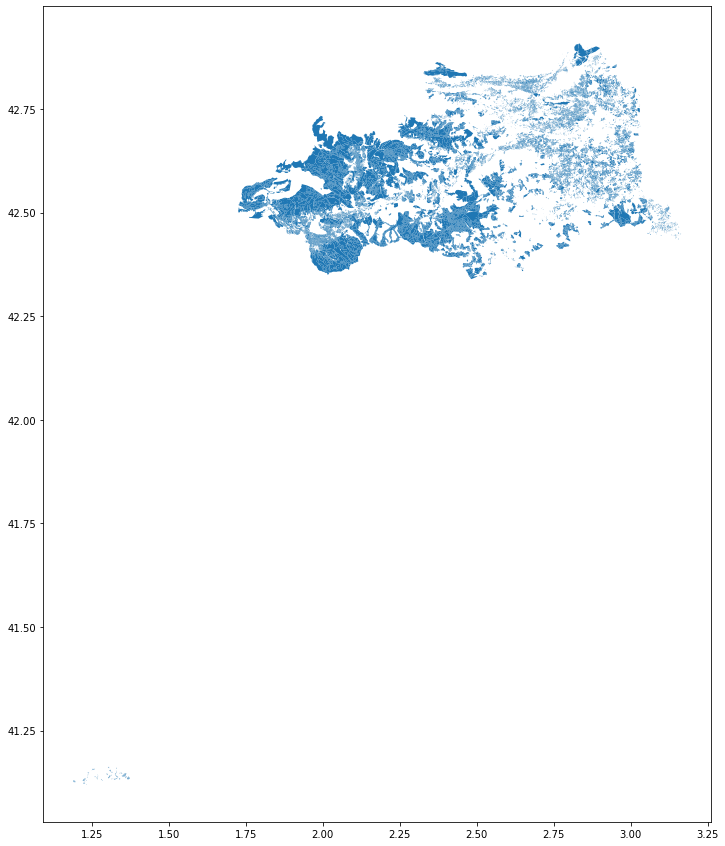

In [66]:
concat_PO_Tarragona_ICC.plot(figsize=(15, 15))

# Girona

,SURF_PARC,geometry,ID_GROUP_ICC,CODE_GROUP,CODE_CULTU
0,2.2277,"POLYGON ((488156.452 4693922.606, 488163.818 4...",1,9,9
1,0.0359,"POLYGON ((489040.070 4693987.076, 489038.706 4...",9,9,9
2,0.1919,"POLYGON ((487566.285 4692535.295, 487544.544 4...",4,9,9
3,0.0351,"POLYGON ((487784.782 4692537.675, 487783.105 4...",4,9,9
4,0.1054,"POLYGON ((487648.347 4692657.438, 487651.836 4...",4,9,9
...,...,...,...,...,...
68877,0.9389,"POLYGON ((471038.148 4647755.994, 471042.617 4...",9,9,9
68878,0.4970,"POLYGON ((470600.245 4645800.364, 470559.544 4...",9,9,9
68879,0.7704,"POLYGON ((469862.209 4646105.262, 469866.789 4...",9,9,9
68880,0.0873,"POLYGON ((469286.795 4646587.381, 469290.487 4...",#,9,9


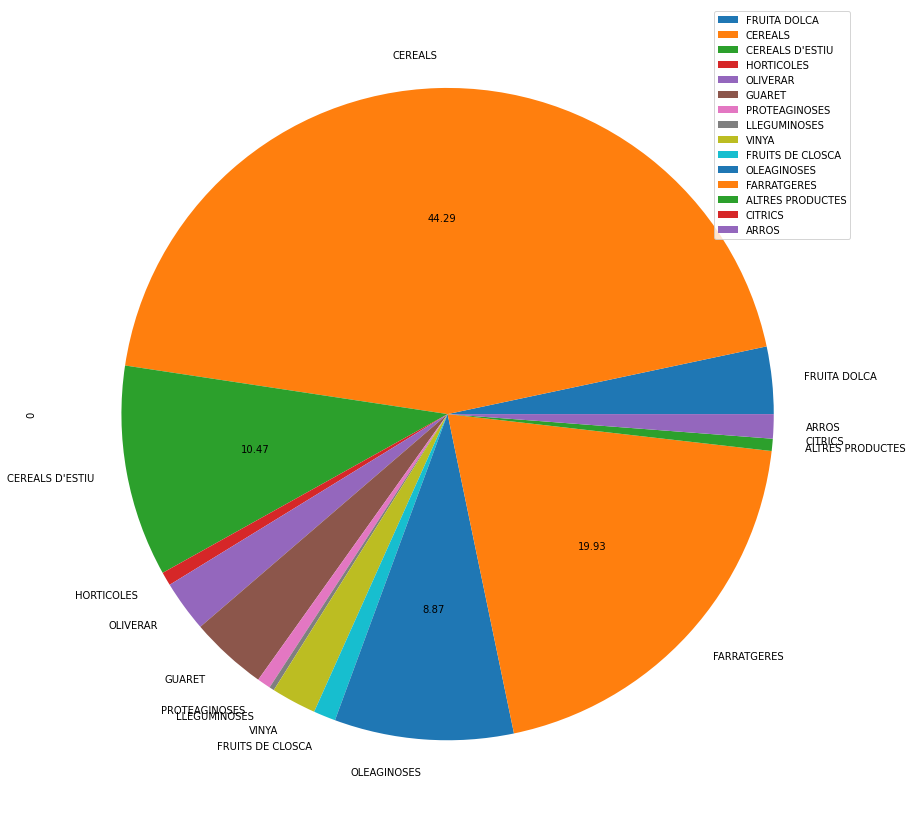

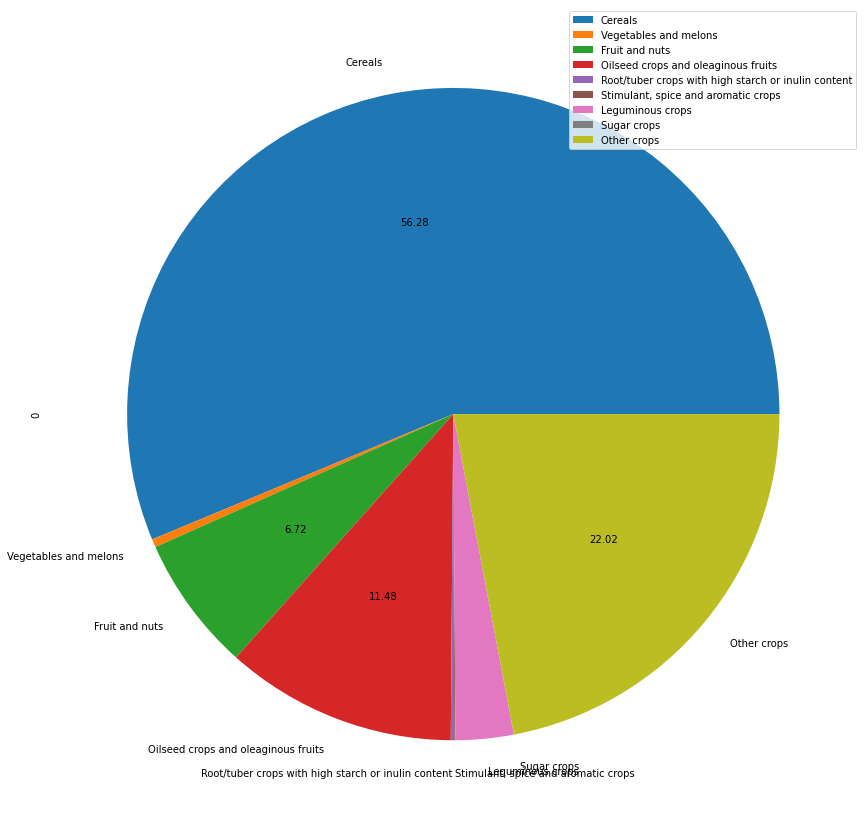

In [40]:
Girona_crops = croplands_Catalunya_2020.loc[croplands_Catalunya_2020.loc[:,'Provincia']=='Girona']
Girona_crops

Girona_crops = Girona_crops[['Grup','Cultiu','HA','geometry']]

surf_tot_GIR = Girona_crops["HA"].sum()
percentages_GIR = {}
for k,v in group_cat_dict.items(): 
    a = Girona_crops[Girona_crops['Grup']==str(v)]
    s = a["HA"].sum()
    p = (s*100) / surf_tot_GIR
    percentages_GIR[v] = p
per_GIR_2020_croplands = pd.DataFrame.from_dict(percentages_GIR,orient='index')
per_GIR_2020_croplands.plot.pie(y=0, figsize=(15, 15), autopct=autopct)

Girona_icc_merged = Girona_crops.merge(conversion_cat_icc, how='left', on='Cultiu')
Girona_icc_merged

surf_tot_Girona = Girona_crops["HA"].sum()
percentages_icc = {}
for k,v in group_dict_icc.items(): 
    a = Girona_icc_merged[Girona_icc_merged['ID_GROUP_ICC']==str(k)]
    s = a["HA"].sum()
    p = (s*100) / surf_tot_Girona
    percentages_icc[v] = p
percentages_icc
df_icc_2 = pd.DataFrame.from_dict(percentages_icc,orient='index')
df_icc_2
df_icc_2.plot.pie(y=0, figsize=(15, 15), autopct=autopct)
Grups = Girona_icc_merged['Grup'].unique()
Grups
Cultius = Girona_icc_merged['Cultiu'].unique()
Cultius
Grups_keys = create_keys(Grups)
Grups_keys
Cultius_keys = create_keys(Cultius)
Cultius_keys
Girona_icc_merged['CODE_GROUP'] = Girona_icc_merged['Grup'].apply(lambda x : k if (x == v for k,v in Grups_keys) else x)
Girona_icc_merged['CODE_CULTU'] = Girona_icc_merged['Cultiu'].apply(lambda x : k if (x == v for k,v in Cultius_keys) else x)
Girona_icc_merged
Girona_icc_merged.drop(['Grup','Cultiu'],axis=1,inplace=True)
Girona_icc_merged.rename(columns={'HA':'SURF_PARC'},inplace=True)
Girona_icc_merged

<AxesSubplot:>

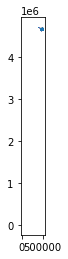

In [55]:
concat_PO_Girona_ICC.plot()

In [43]:
concat_PO_Girona_ICC = pd.concat([PO_icc_merged,Girona_icc_merged], ignore_index=True)

,CODE_CULTU,CODE_GROUP,SURF_PARC,geometry,ID_GROUP_ICC
0,SNE,28,0.3200,"POLYGON ((2.89920 42.88355, 2.89954 42.88367, ...",9
1,SNE,28,0.7100,"POLYGON ((2.88031 42.87663, 2.88035 42.87665, ...",9
2,SPH,17,1.1400,"POLYGON ((2.32431 42.68450, 2.32352 42.68453, ...",9
3,SPH,17,96.1400,"POLYGON ((2.32345 42.68447, 2.32352 42.68453, ...",9
4,SPH,17,332.3300,"POLYGON ((1.96658 42.64489, 1.96721 42.64599, ...",9
...,...,...,...,...,...
114447,9,9,0.9389,"POLYGON ((471038.14830 4647755.99430, 471042.6...",9
114448,9,9,0.4970,"POLYGON ((470600.24450 4645800.36370, 470559.5...",9
114449,9,9,0.7704,"POLYGON ((469862.20920 4646105.26240, 469866.7...",9
114450,9,9,0.0873,"POLYGON ((469286.79480 4646587.38100, 469290.4...",#


In [42]:
PO_icc_merged

,CODE_CULTU,CODE_GROUP,SURF_PARC,geometry,ID_GROUP_ICC
0,SNE,28,0.32,"POLYGON ((2.89920 42.88355, 2.89954 42.88367, ...",9
1,SNE,28,0.71,"POLYGON ((2.88031 42.87663, 2.88035 42.87665, ...",9
2,SPH,17,1.14,"POLYGON ((2.32431 42.68450, 2.32352 42.68453, ...",9
3,SPH,17,96.14,"POLYGON ((2.32345 42.68447, 2.32352 42.68453, ...",9
4,SPH,17,332.33,"POLYGON ((1.96658 42.64489, 1.96721 42.64599, ...",9
...,...,...,...,...,...
45565,SPL,17,330.95,"POLYGON ((2.86169 42.89299, 2.86121 42.89231, ...",9
45566,PPH,18,4.17,"POLYGON ((2.12365 42.61302, 2.12365 42.61298, ...",9
45567,SBO,28,0.21,"POLYGON ((2.98326 42.75533, 2.98384 42.75692, ...",9
45568,SNE,28,0.37,"POLYGON ((2.97821 42.68585, 2.97858 42.68613, ...",9


In [70]:
Girona_icc_merged.head(15)

,SURF_PARC,geometry,ID_GROUP_ICC,CODE_GROUP,CODE_CULTU
0,2.2277,"POLYGON ((2.85609 42.39751, 2.85618 42.39739, ...",1,9,9
1,0.0359,"POLYGON ((2.86683 42.39810, 2.86681 42.39811, ...",9,9,9
2,0.1919,"POLYGON ((2.84895 42.38500, 2.84869 42.38494, ...",4,9,9
3,0.0351,"POLYGON ((2.85161 42.38503, 2.85159 42.38499, ...",4,9,9
4,0.1054,"POLYGON ((2.84995 42.38611, 2.84999 42.38606, ...",4,9,9
...,...,...,...,...,...
68877,0.9389,"POLYGON ((2.65040 41.98127, 2.65045 41.98114, ...",9,9,9
68878,0.4970,"POLYGON ((2.64521 41.96364, 2.64472 41.96356, ...",9,9,9
68879,0.7704,"POLYGON ((2.63629 41.96636, 2.63634 41.96633, ...",9,9,9
68880,0.0873,"POLYGON ((2.62932 41.97068, 2.62936 41.97066, ...",#,9,9


In [44]:
Catalunya_outline = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/Límits administratius provincials de Catalunya")
Girona_outline = Catalunya_outline.loc[Catalunya_outline.loc[:,'nom_prov']=='Girona']
Girona_outline

,nom_prov,provincia,sup_prov,geometry
2,Girona,17,5903.45,"MULTIPOLYGON (((3.11670 42.14556, 3.11678 42.1..."


<AxesSubplot:>

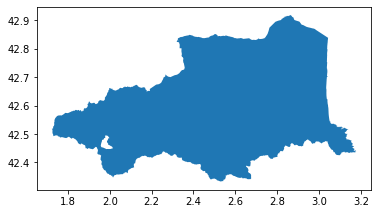

In [48]:
PO_outline.plot()

<AxesSubplot:>

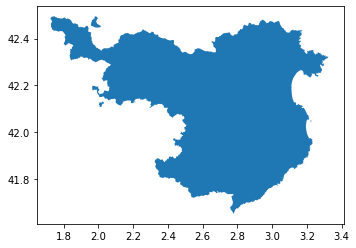

In [49]:
Girona_outline.plot()

<AxesSubplot:>

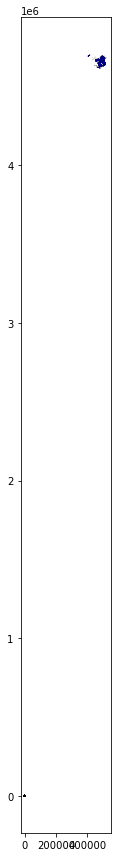

In [45]:
ax = PO_outline.boundary.plot(color='black',figsize=(15, 15))
Girona_outline.boundary.plot(ax = ax, color='black')
concat_PO_Girona_ICC.plot(ax=ax, cmap='jet', column = 'CODE_GROUP')

In [88]:
PO_icc_merged.to_file("/home/BTemple-Boyer-Dury/Documents/geopandas/geojson/PO_ICC.json", driver="GeoJSON")

/home/BTemple-Boyer-Dury/miniconda3/envs/classificrops_env/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [89]:
Girona_icc_merged.to_file("/home/BTemple-Boyer-Dury/Documents/geopandas/geojson/Girona_ICC.json", driver="GeoJSON")

/home/BTemple-Boyer-Dury/miniconda3/envs/classificrops_env/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [94]:
concat_PO_Girona_ICC.to_file("/home/BTemple-Boyer-Dury/Documents/geopandas/geojson/PO_Girona_ICC.json", driver="GeoJSON")

/home/BTemple-Boyer-Dury/miniconda3/envs/classificrops_env/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


# evolution vigne in Occitania from 2015 to 2020

In [4]:
Occitania_2015 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/RPG_2-0__SHP_LAMB93_R76-2015_2015-01-01/PARCELLES_GRAPHIQUES.shp")

In [5]:
Occitania_2016 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/RPG_2-0__SHP_LAMB93_R76-2016_2016-01-01/PARCELLES_GRAPHIQUES.shp")

In [6]:
Occitania_2017 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/RPG_2-0__SHP_LAMB93_R76-2017_2017-01-01.7z/PARCELLES_GRAPHIQUES.shp")

In [30]:
Occitania_2018 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/RPG_2-0__SHP_LAMB93_R76-2018_2018-01-15.7z/PARCELLES_GRAPHIQUES.shp")

In [34]:
Occitania_2019 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/RPG_2-0__SHP_LAMB93_R76-2019_2019-01-15/PARCELLES_GRAPHIQUES.shp")

KeyboardInterrupt: 

In [ ]:
Occitania_2020 = gpd.read_file("/home/BTemple-Boyer-Dury/Documents/geopandas/RPG_2-0_SHP_LAMB93_R76_2020/PARCELLES_GRAPHIQUES.shp")

In [7]:
guarrigue_2015 = Occitania_2015.loc[Occitania_2015.loc[:,"CODE_GROUP"]=="17"]
guarrigue_2015 = guarrigue_2015["SURF_PARC"].sum()
guarrigue_2015

215811.01

In [10]:
guarrigue_2016 = Occitania_2016.loc[Occitania_2016.loc[:,"CODE_GROUP"]=="17"]
guarrigue_2016 = guarrigue_2016["SURF_PARC"].sum()
guarrigue_2016

219096.73000000004

In [26]:
for y in [2015,2016,2017,2018]:
    'vignes_'+y = 'Occitania_'+y.loc['Occitania_'+y.loc[:,"CODE_GROUP"]=="21"]
    'surf_vignes_'+y = 'vignes_'+y["SURF_PARC"].sum()
    print('surf_vignes_'+y)

NameError: name 'vignes_' is not defined

215811.01
219096.73000000004
220025.62
221381.99999999997


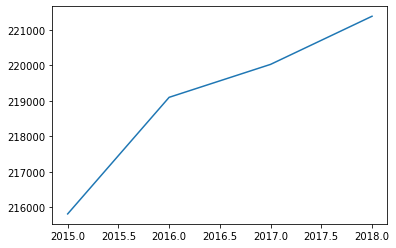

In [44]:
my_list=[]
for df in [Occitania_2015, Occitania_2016, Occitania_2017, Occitania_2018]:
    guarrigue = df.loc[df.loc[:,"CODE_GROUP"]=="17"]
    surf_guarrigue = guarrigue["SURF_PARC"].sum()
    print(surf_guarrigue)
    my_list.append(surf_guarrigue)
guarrigue_2015_2018
plt.plot([2015,2016,2017,2018],my_list)

FileNotFoundError: [Errno 2] No such file or directory: '/home/BTemple-Boyer-Dury/Documents/geopandas/France_group.csv'